# Finn - summary stats and extra plots

Now using data from 23/9/2022

In [1]:
import os
import pandas as pd
import matplotlib. pyplot as plt
plt.style.use(["ggplot", "icm.mplstyle"])

In [2]:
plot_save_args = {
    'bbox_inches': 'tight',
    'dpi': 300,
    'format': 'png'
}

In [3]:
papers_df = pd.read_csv(os.path.join("data", "review_176995_20220923155148.csv"))
papers_df = papers_df.drop("Comments (enter 'N/A' if none)", axis=1)

In [4]:
papers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 41 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   Covidence #                                                73 non-null     int64 
 1   Study ID                                                   72 non-null     object
 2   Title                                                      73 non-null     object
 3   Reviewer Name                                              73 non-null     object
 4   Title.1                                                    73 non-null     object
 5   Year of publication                                        73 non-null     int64 
 6   Funding source                                             73 non-null     object
 7   Supervised learning                                        73 non-null     bool  
 8   Unsupervised learning 

## Some summary stats

In [5]:
for year in range(2010, 2023):
    n_papers = (papers_df["Year of publication"] >= year).sum()
    print(
        f"{year} and after:",
        n_papers,
        f"({round(100 * n_papers / papers_df.shape[0], 1)}%)"
    )

2010 and after: 70 (95.9%)
2011 and after: 69 (94.5%)
2012 and after: 69 (94.5%)
2013 and after: 67 (91.8%)
2014 and after: 66 (90.4%)
2015 and after: 65 (89.0%)
2016 and after: 65 (89.0%)
2017 and after: 61 (83.6%)
2018 and after: 58 (79.5%)
2019 and after: 46 (63.0%)
2020 and after: 34 (46.6%)
2021 and after: 20 (27.4%)
2022 and after: 0 (0.0%)


In [6]:
papers_df.loc[
    papers_df['Number of patient episodes is specified'],
    'Total number of patient episodes'
].astype(
    str
).str.replace(",", "").astype(
    float
).quantile([0.25, 0.5, 0.75])

0.25     1338.0
0.50    14908.0
0.75    19686.0
Name: Total number of patient episodes, dtype: float64

Stratified by approach:

In [7]:
for approach in papers_df.columns[7:11]:
    print(
        approach,
        papers_df.loc[
            papers_df['Number of patient episodes is specified'] &
            papers_df[approach],
            'Total number of patient episodes'
        ].astype(
            str
        ).str.replace(",", "").astype(
            float
        ).quantile([0.25, 0.5, 0.75]),
        "\n"
    )

Supervised learning 0.25     1310.0
0.50    10066.0
0.75    19954.0
Name: Total number of patient episodes, dtype: float64 

Unsupervised learning 0.25     5661.0
0.50    13986.5
0.75    18109.5
Name: Total number of patient episodes, dtype: float64 

Reinforcement learning 0.25     7790.25
0.50    17898.00
0.75    19710.25
Name: Total number of patient episodes, dtype: float64 

Biological / physiological model 0.25    31.5
0.50    33.0
0.75    37.5
Name: Total number of patient episodes, dtype: float64 



Non-biological:

In [8]:
papers_df.loc[
    papers_df['Number of patient episodes is specified'] &
    ~papers_df["Biological / physiological model"],
    'Total number of patient episodes'
].astype(
    str
).str.replace(",", "").astype(
    float
).quantile([0.25, 0.5, 0.75])

0.25     3738.00
0.50    14965.00
0.75    20112.25
Name: Total number of patient episodes, dtype: float64

## Algorithm type

findfont: Font family ["sans-serif'"] not found. Falling back to DejaVu Sans.
findfont: Font family ["sans-serif'"] not found. Falling back to DejaVu Sans.


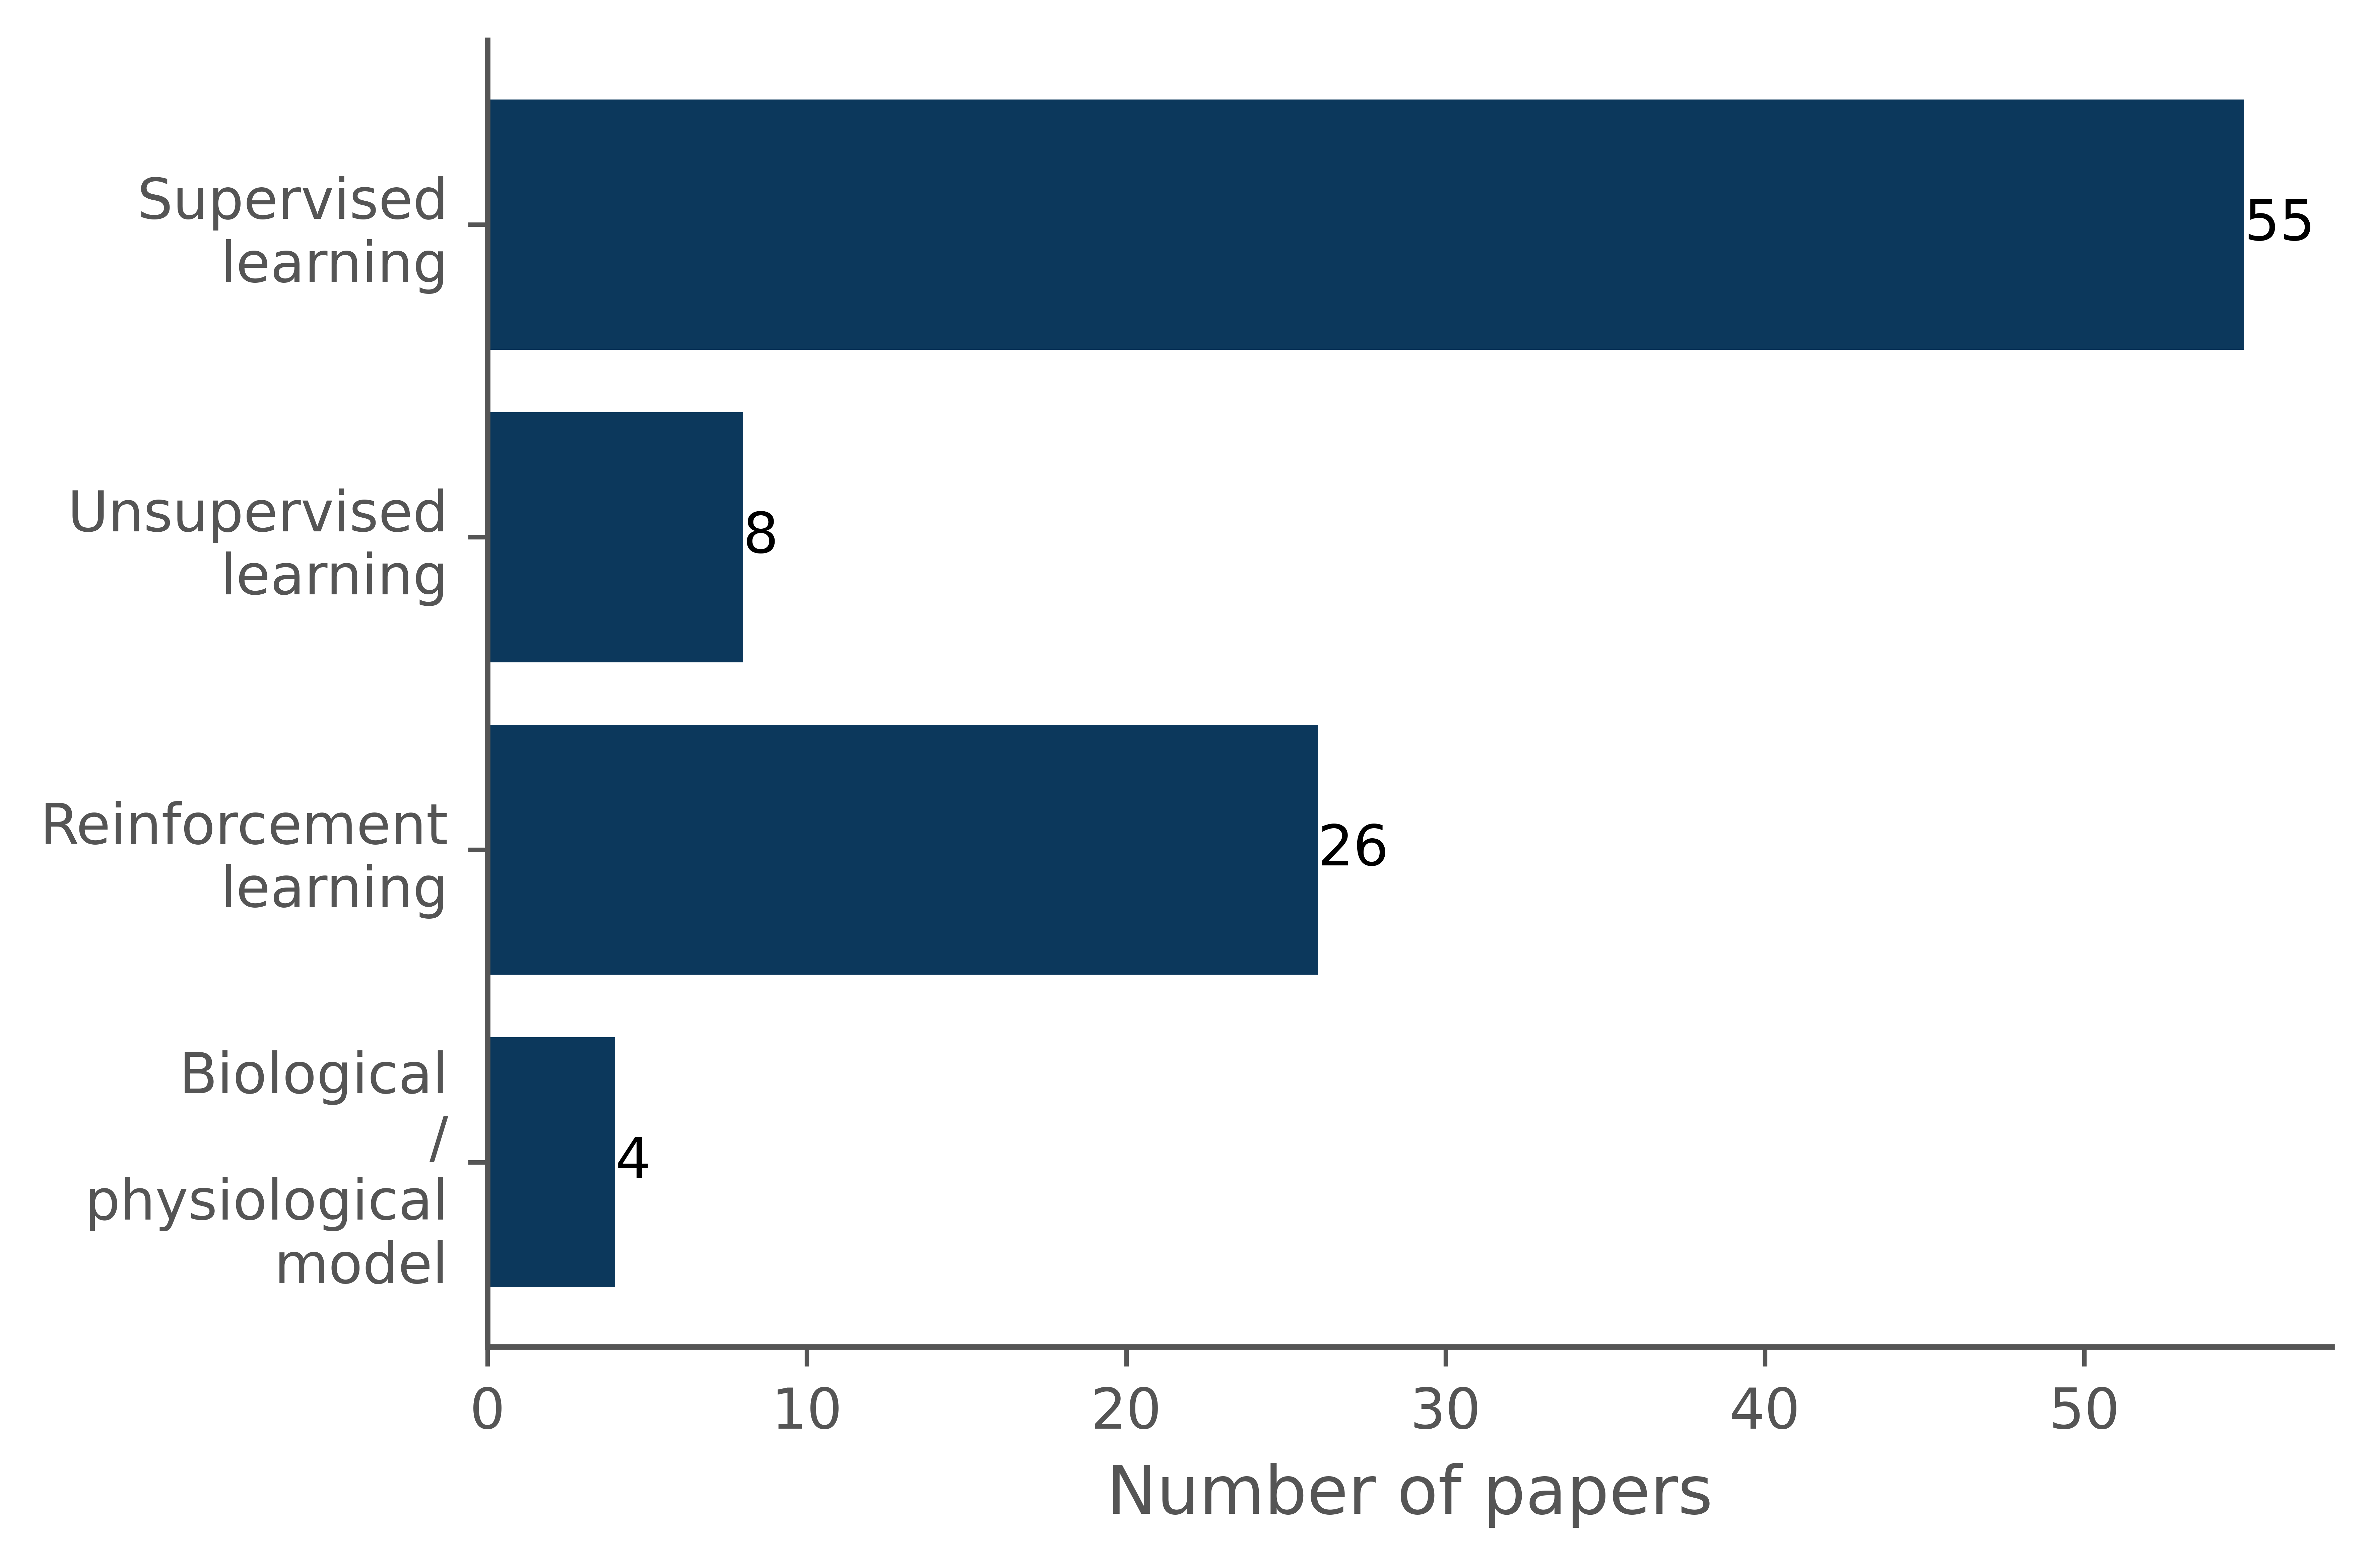

In [9]:
column_names = papers_df.columns[7:11]
counts = papers_df[column_names].sum()
y_position = range(len(counts))

fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
bars = ax.barh(y_position, counts)
ax.invert_yaxis()
ax.bar_label(bars)
ax.set_xlabel("Number of papers")
ax.set_yticks(y_position)
ax.set_yticklabels([lt.replace(' ', '\n') for lt in column_names])

plt.savefig(os.path.join("out", "algorithm_types_bar.png"), **plot_save_args)
plt.show()

In [10]:
(100 * counts / papers_df.shape[0]).round(1)

Supervised learning                 75.3
Unsupervised learning               11.0
Reinforcement learning              35.6
Biological / physiological model     5.5
dtype: float64

## Datasets used

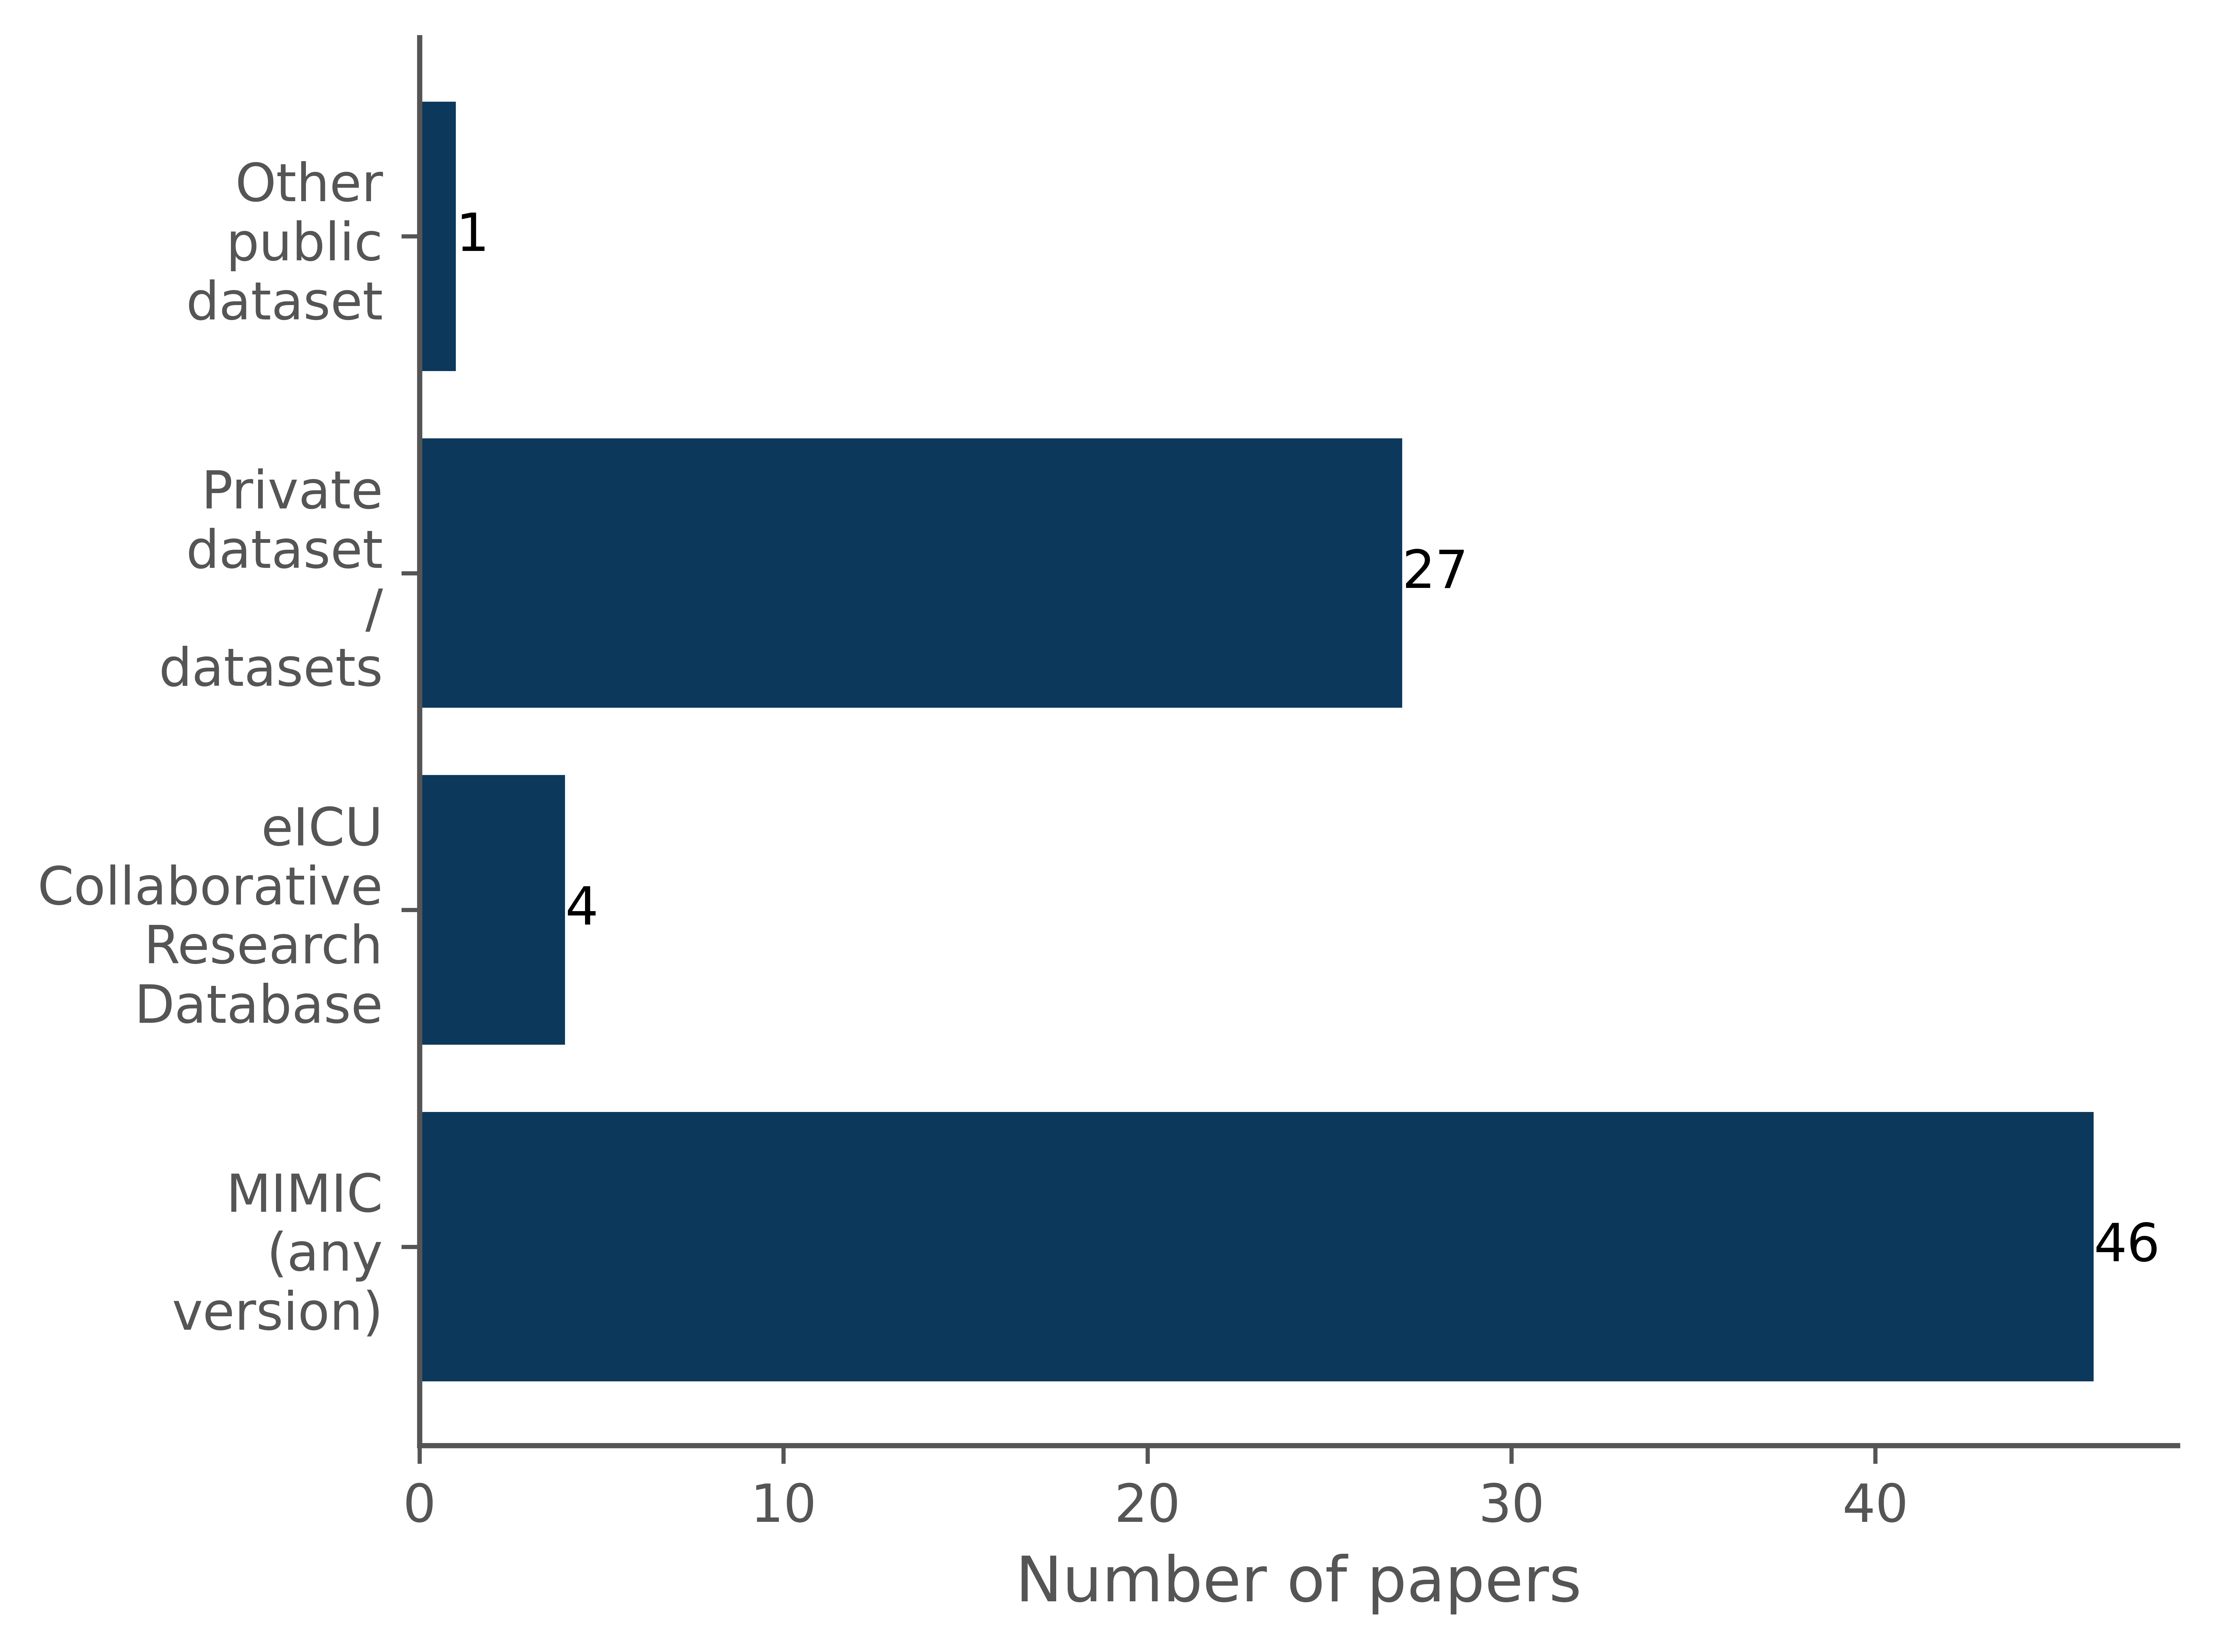

In [12]:
column_names = papers_df.columns[12:16]
counts = papers_df[column_names].sum()
y_position = range(len(counts))

fig, ax = plt.subplots(figsize=(6, 4.5), tight_layout=True)
bars = ax.barh(y_position, counts)
ax.bar_label(bars)
ax.set_xlabel("Number of papers")
ax.set_yticks(y_position)
ax.set_yticklabels([lt.replace(' ', '\n') for lt in column_names])

fig.savefig(os.path.join("out", "datasets_bar.png"), **plot_save_args)
plt.show()

In [13]:
(100 * counts / papers_df.shape[0]).round(1)

MIMIC (any version)                     63.0
eICU Collaborative Research Database     5.5
Private dataset / datasets              37.0
Other public dataset                     1.4
dtype: float64

## Data types

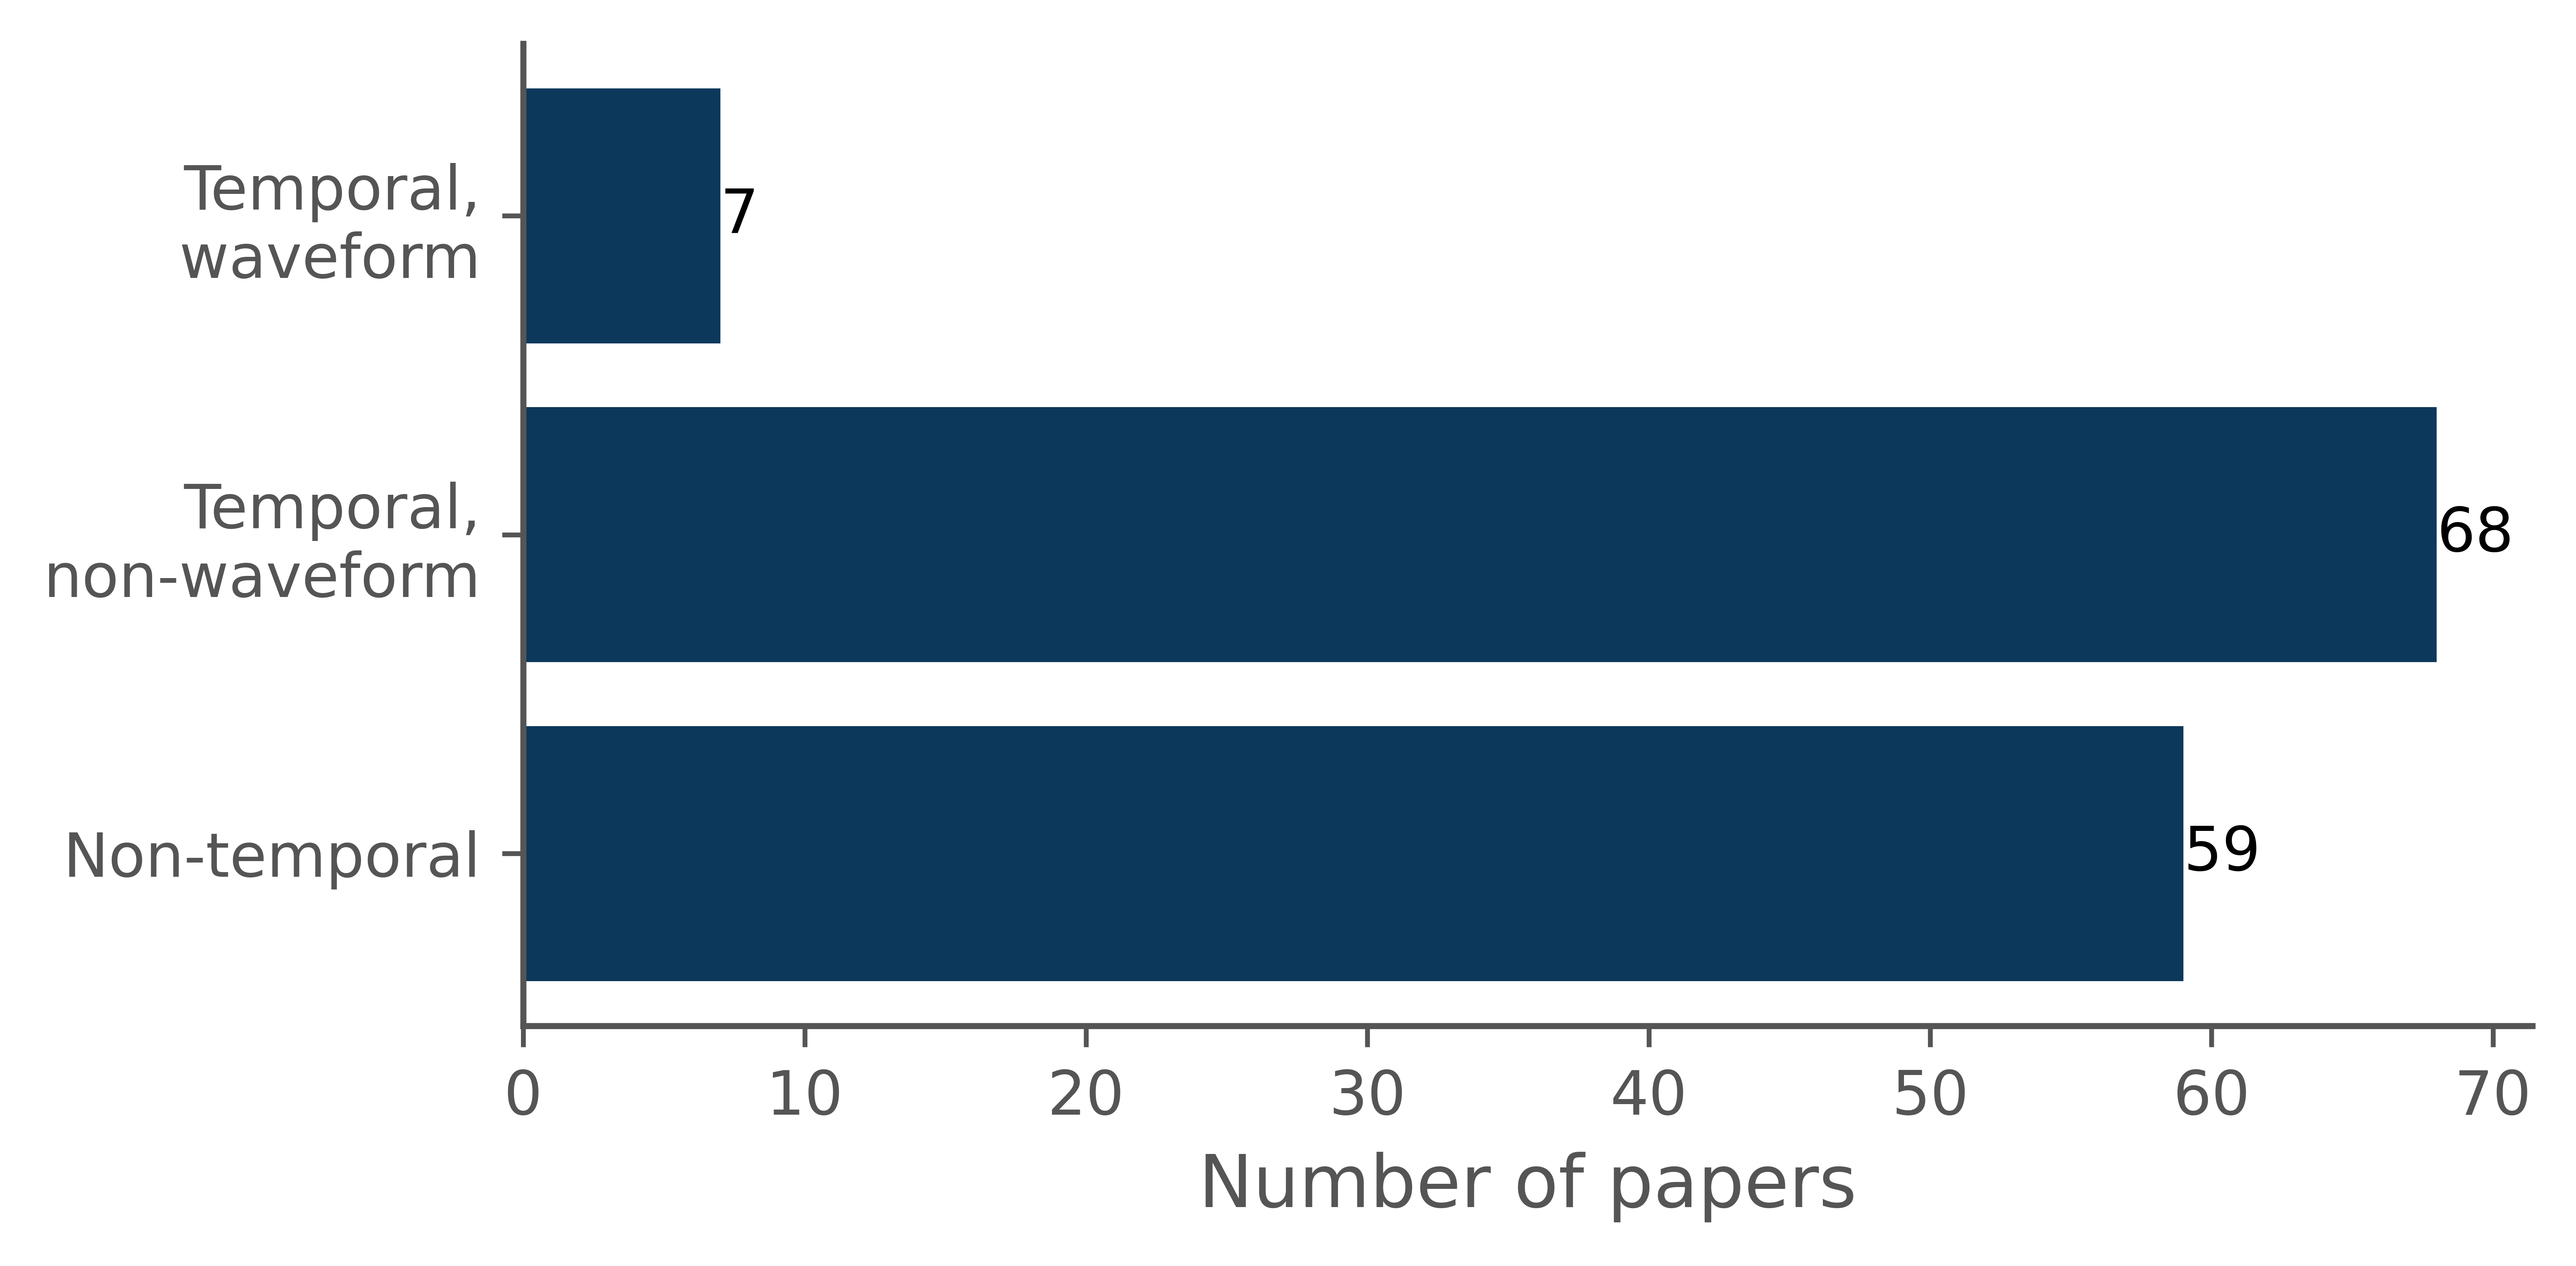

In [14]:
column_names = papers_df.columns[21:24]
counts = papers_df[column_names].sum()
y_position = range(len(counts))

fig, ax = plt.subplots(figsize=(6, 3), tight_layout=True)
bars = ax.barh(y_position, counts)
ax.bar_label(bars)
ax.set_xlabel("Number of papers")
ax.set_yticks(y_position)
ax.set_yticklabels([lt.replace(' ', '\n') for lt in column_names])

fig.savefig(os.path.join("out", "data_types_bar.png"), **plot_save_args)
plt.show()

In [15]:
(100 * counts / papers_df.shape[0]).round(1)

Non-temporal              80.8
Temporal, non-waveform    93.2
Temporal, waveform         9.6
dtype: float64

## Sepsis definition

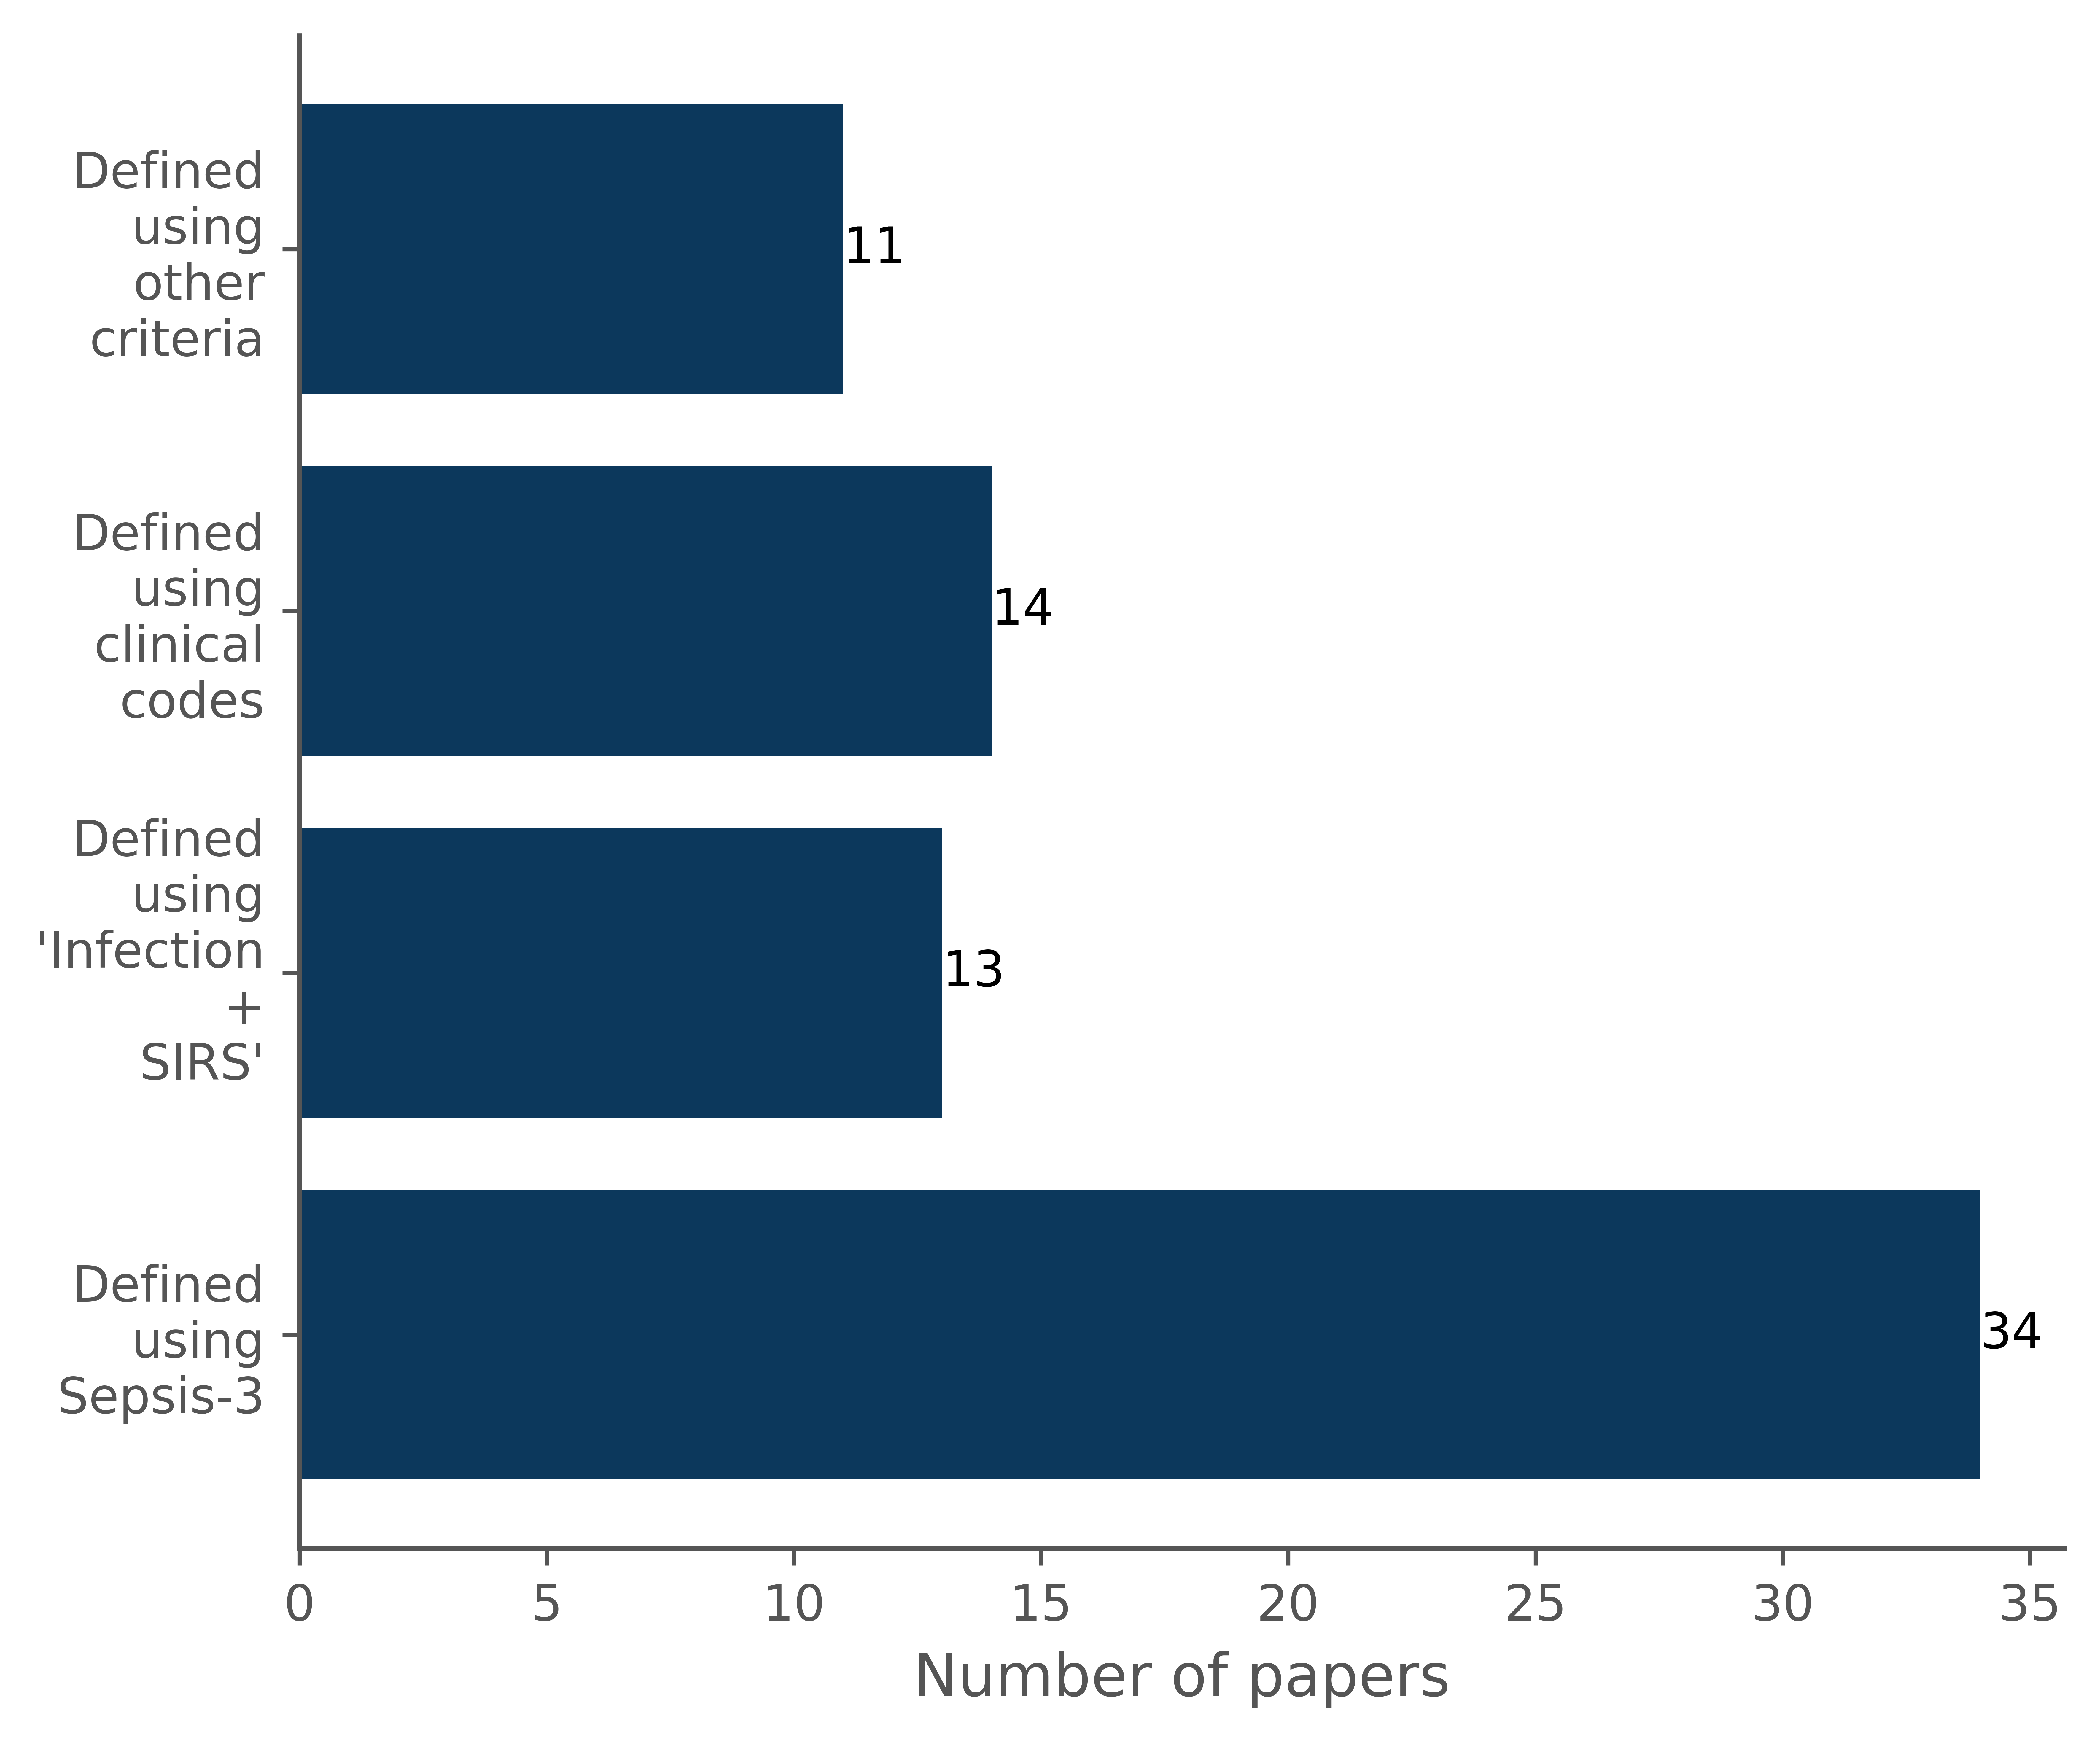

In [16]:
column_names = papers_df.columns[25:29]
counts = papers_df[column_names].sum()
y_position = range(len(counts))

fig, ax = plt.subplots(figsize=(6, 5), tight_layout=True)
bars = ax.barh(y_position, counts)
ax.bar_label(bars)
ax.set_xlabel("Number of papers")
ax.set_yticks(y_position)
ax.set_yticklabels([lt.replace(' ', '\n') for lt in column_names])

fig.savefig(os.path.join("out", "sepsis_definition_bar.png"), **plot_save_args)
plt.show()

In [17]:
(100 * counts / papers_df.shape[0]).astype(float).round(1)

Defined using Sepsis-3               46.6
Defined using 'Infection + SIRS'     17.8
Defined using clinical codes         19.2
Defined using other criteria         15.1
dtype: float64

## Septic shock definition

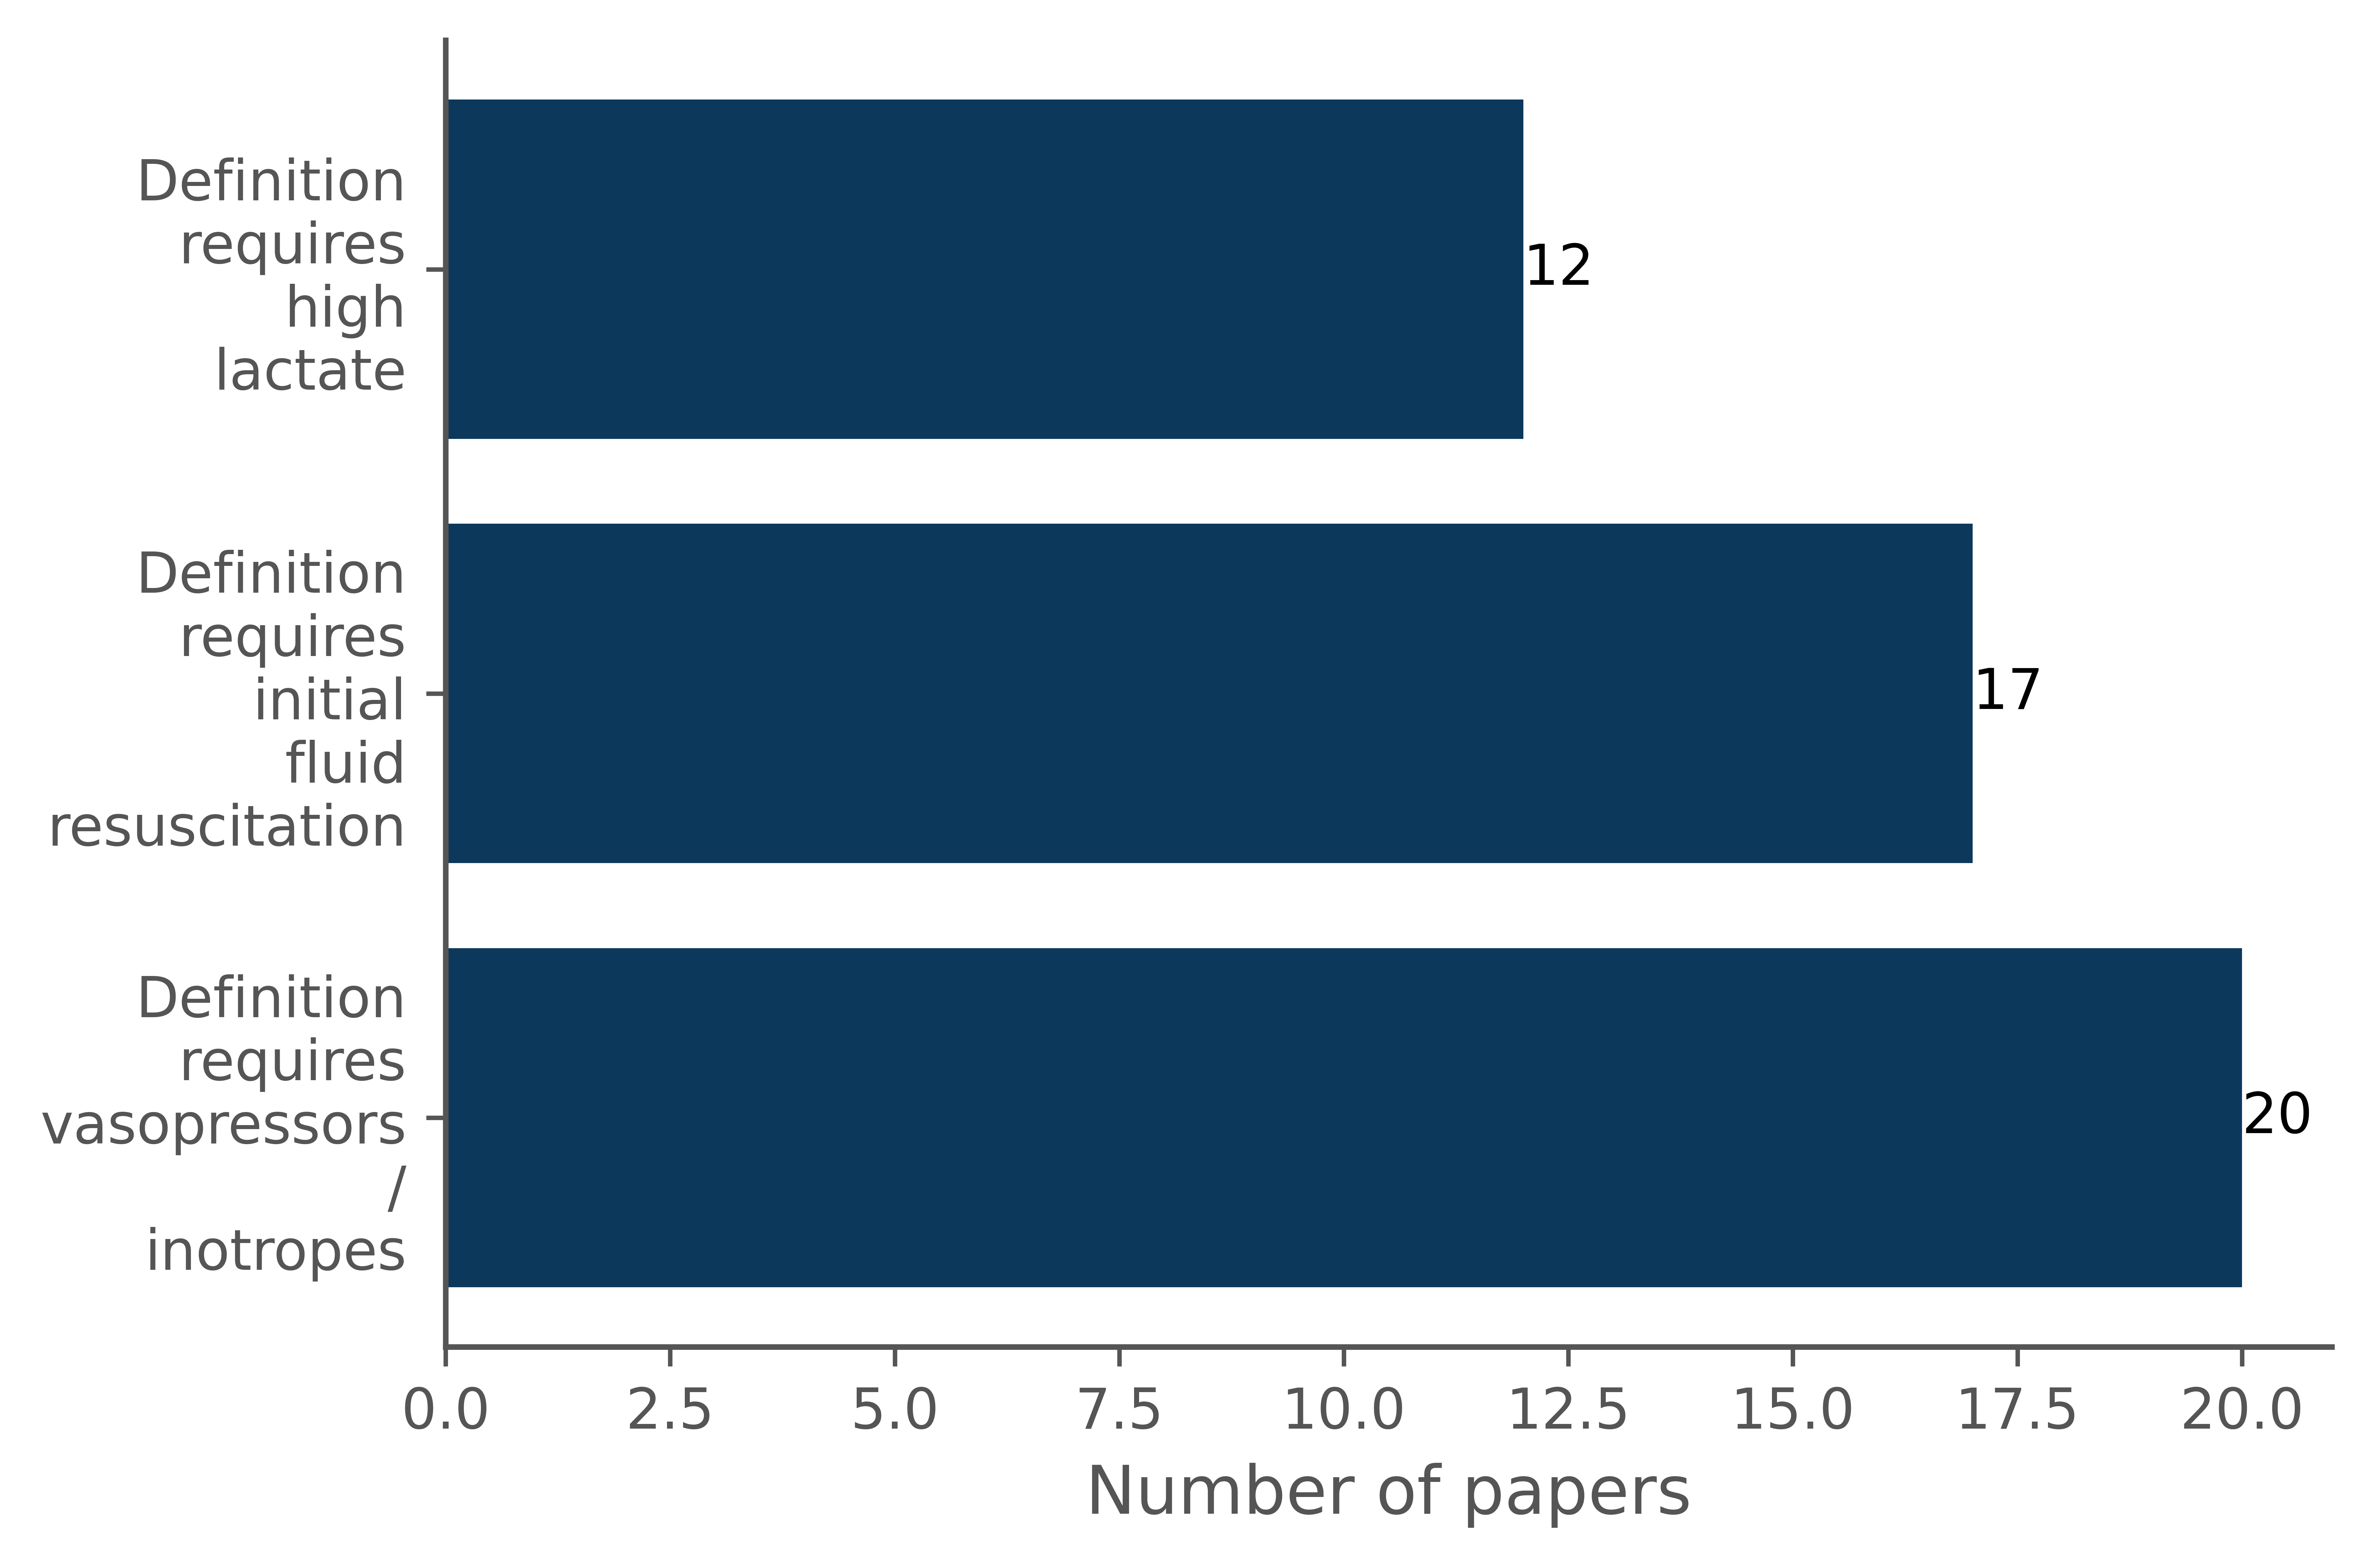

In [18]:
column_names = papers_df.columns[30:33]
counts = papers_df[column_names].sum()
y_position = range(len(counts))

fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
bars = ax.barh(y_position, counts)
ax.bar_label(bars)
ax.set_xlabel("Number of papers")
ax.set_yticks(y_position)
ax.set_yticklabels([lt.replace(' ', '\n') for lt in column_names])

fig.savefig(os.path.join("out", "septic_shock_definition_bar.png"), **plot_save_args)
plt.show()

In [19]:
(100 * counts / papers_df.shape[0]).astype(float).round(1)

Definition requires vasopressors / inotropes       27.4
Definition requires initial fluid resuscitation    23.3
Definition requires high lactate                   16.4
dtype: float64

## Translation

In [20]:
column_names = papers_df.columns[33:]
counts = papers_df[column_names].sum()
y_position = range(len(counts))

fig, ax = plt.subplots(figsize=(6, 9), tight_layout=True)
bars = ax.barh(y_position, counts)
ax.invert_yaxis()
ax.bar_label(bars)
ax.set_xlabel("Number of papers")
ax.set_yticks(y_position)
ax.set_yticklabels([lt.replace(' ', '\n') for lt in column_names])

plt.savefig(os.path.join("out", "translation_bar.png"), **plot_save_args)
plt.show()

In [21]:
(100 * counts / papers_df.shape[0]).astype(float).round(1)

Internal validation                                          80.8
External retrospective validation (other hospitals)           2.7
External retrospective validation (separate dataset)          8.2
Prospective observational validation                          6.8
Non-randomised interventional validation (clinical trial)     4.1
Randomised interventional validation (clinical trial)         1.4
Regulatory approval                                           0.0
Post-deployment surveillance                                  0.0
dtype: float64